# Finite Element Tutorial in Python
Introduction to the Python Laboratory for Finite Element Analysis (pyLabFEA). This tutorial covers FEA with elements in one or two dimensions to evaluate the mechanical behavior of laminate geometries with linear elastic materials. See the <a rel="docs" href="https://ahartmaier.github.io/pyLabFEA/">online documentation</a> of the pyLabFEA package for detailed information. NumPy (http://www.numpy.org) is used for mathematical operations on arrays and matplotlib (https://matplotlib.org/) for the visualization of numerical results.

Author: Alexander Hartmaier, ICAMS / Ruhr-Universität Bochum

March 2020

This work is licensed under a Creative 
Commons Attribution-NonCommercial-ShareAlike 4.0 International License
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">(CC-BY-NC-SA)</a>
 <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
<img alt="Creative Commons License" style="border-width:0;max-heigt:9px;height:100%;" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

The pyLabFEA package comes with ABSOLUTELY NO WARRANTY. This is free
software, and you are welcome to redistribute it under the conditions of
the GNU General Public License <a href="http://www.fsf.org/licensing/licenses/gpl.html">(GPLv3)</a> 

## Python Laboratory for Finite Element Analysis (pyLabFEA)
In the first step, the pyLabFEA package, containing the modules pyLabFEM and pyLabMaterial, is imported.


In [1]:
import sys
if ("../source" not in sys.path):
    sys.path.append("../source")
import pyLabFEM as FE
from pyLabMaterial import Material

## Model

The class `Model` is invoked to create an objecte for the finite element model to be used. This object contains all attributes of the model and defines the methods. To use the model for FEA, the following steps are performed: (i) geometry definition, (ii) material definition, (iii) applying boundary conditions, (iv) meshing, (v) solving of linear equations, and (vi) calculation of element stresses and strains by calling the corresponding methods of the class `Model`. 

<b>Parameters:</b> <br/>
dim (optional): dim=1 for 1-d model, dim=2 for 2-d model (default: dim=1)<br/>
planestress (optional, used only in 2-d models): True if plane stress conditions shall be considered (default: planestress=False)<br/>

<b> Methods: </b><br/>
`geom`: define (laminate) geometry with sections<br/>
`assign`: assign material properties to sections<br/>
`bcleft`, `bcright`, `bctop`, `bcbot`: define boundary conditions<br/>
`mesh`: generate mesh (1-d elements with linear or quadratic shape functions or 2-d mesh with linear quadriliteratl elements)<br/>
`solve`: setup stiffness matrix and calculate displacements satisfying mechanical equilibrium, i.e. $f=0$ for internal nodes, for given boundary conditions <br/>
`calc_global`: calculate global stress and strain based on displacements and residual forces of boundary nodes <br/>
`plot`: show graphical representation of mechanical quantities mapped into deformed shape


In [2]:
fem = FE.Model()   # create element of class Model

## Geometry

Define the geometry of the model with method `geom`. The geometry is subdivided into sections, representing a 1-d or 2-d laminate structure normal to the $x$-direction. The sections are given as a list with the absolute length of each section. The total length of the model is the sum of all section lengths. All lengths are given in units of 1 mm.

<b>Parameters:</b><br/>
sect: list with absolute length of each section in x-direction<br/>
LY (optional): height of model in y-direction (default: LY=1)<br/>
LZ (optional): thickness of model in z-direction (default: LZ=1)<br/>

In [3]:
fem.geom([3, 2, 4])  # define sections in absolute lengths

## Materials

Material properties are given either in terms of anisotropic elastic constants $C_{11}$, $C_{12}$, $C_{44}$, or – in case of an elastically isotropic material – as Young's modulus $E$ and Poisson's ratio $\nu$. The parameters must be given with their name. The material is created by applying the class `Material`, which defines a container for the attributes and methods describing material properties and behavior. Elastic properties are defined by calling the method `elasticity` with the appropriate set of parameters.  

<b>Class:</b><br/>
`Material`

<b>Methods:</b><br/>
`elasticity:` define linear elastic material either by anisoptropic or by isotropic constants. Note: One complete set of elastic parameters must be provided.<br/>
<b>Paramaters:</b><br/>
C11, C12, C44 (optional): anisotropic elastic constants<br/>
E, nu (optional): Young's modulus and Poisson's ratio (isotropic elasticity)<br/>
one of both parameter sets must be provided<br/>

<b>Attributes:</b><br/>
sets internal variables for $C_{11}$, $C_{12}$, $C_{44}$, $E$ and $\nu$ <br/>



In [4]:
mat1 = Material()                    # create element of class Material
mat1.elasticity(E=200.e3, nu=0.3)    # assign isotropic elastic properties
mat2 = Material()
mat2.elasticity(E=100.e3, nu=0.3)
mat3 = Material()
mat3.elasticity(E=500.e3, nu=0.3)
print('MAT1: C11, C12, C44, E, nu', mat1.C11, mat1.C12, mat1.C44, mat1.E, mat1.nu)
print('MAT2: C11, C12, C44, E, nu', mat2.C11, mat2.C12, mat2.C44, mat2.E, mat2.nu)
print('MAT3: C11, C12, C44, E, nu', mat3.C11, mat3.C12, mat3.C44, mat3.E, mat3.nu)


MAT1: C11, C12, C44, E, nu 269230.76923076925 115384.61538461539 76923.07692307692 200000.0 0.3
MAT2: C11, C12, C44, E, nu 134615.38461538462 57692.307692307695 38461.53846153846 100000.0 0.3
MAT3: C11, C12, C44, E, nu 673076.923076923 288461.53846153844 192307.6923076923 500000.0 0.3


## Assigning materials to model sections

Each section has to be assigned a material, which is accomplished by calling the according method of the class `Model` with the list of materials, which must have the same shape as the list of sections in the geometry definition.

<b>Class: </b>`Model`<br/>
<b>Method:</b><br/>
`assign`: assign a material to each section<br/assign: assign a material to each section<br/>
<b>Paramaters:</b><br/>
mats: list of materials, each defined by class `Material`, with same shape as in method `geom`. Each section is assigned to the according material.<br/>
<b>Attributes</b><br/>
fem.mat: list with pointer to material for each section<br/>

In [5]:
fem.assign([mat1, mat2, mat3])  # assign materials to sections of model
print(fem.mat)


[<pyLabMaterial.Material object at 0x1a164b3950>, <pyLabMaterial.Material object at 0x1a164b3990>, <pyLabMaterial.Material object at 0x1a164b3a90>]


## Boundary Conditions

For left-hand-side and bottom nodes a displacement is given, typically $u_{\rm left}=u_{\rm bot}=0$.

The type of boundary conditions for right-hand-side and top nodes is specified as either displacement (type='disp') or force (type='force'). Value and type must be specified as parameters in this sequence.

For 1-d models only `bcleft` and `bcright` can be called.

<b>Method:</b><br/>
`bcleft`: set displacement for lhs node(s)<br/>
`bcbot`: set displacement for bottom node(s), has no function for 1-d models<br/>
<b>Paramaters:</b><br/>
scalar value: Displacement for boundary node(s)

<b>Method:</b><br/>
`bcright`: set displacement or force for rhs node(s)<br/>
`bctop`: set displaement or force for top node(s), has no function for 1-d models<br/>
<b>Paramaters:</b><br/>
scalar value: Displacement of force for boundary nodes<br/>
bctype: string indicating type of boundary conditions: 'disp' for displacements, 'force' for forces

In [6]:
fem.bcleft(0.)     # define displacement boundary condition on lhs node (u_x given as parameter)
fem.bcright(0.1*fem.lenx, 'disp')   # rhs node is subject to 10% strain (disp = 0.1 * length of model)


## Meshing

Create a structured mesh with 1-d elements or 2-d quadrilateral elements. Nodes are situated at the corners of the elements and in the middle of the edges for quadratic shape functions. The finite elements of the model are stored in a list with elements of the subclass `element` with its own attributes and methods, which are used to setup the element shape function.

<b>Method (class Model):</b><br/>
mesh<br/>
<b>Parameters:</b> <br/>
NX (optional): number of elements in x-direction (default: NX=10)<br/>
NY (optional): number of elements in y-direction (default: NY=1), only effective for 2-d models<br/>
SF (optional): degree of shape functions: 1=linear (default), 2=quadratic

<b>Subclass: `Element` (parent class: `Model`)</b><br/>
<b>Methods:</b><br/>
calc_Bmat: Calculate B matrix at Gauss point<br/>
calc_Kel: calculate element stiffness matrix<br/>
<b>Attributes:</b><br/>
nodes: list of nodes of this element<br/>
Lelx, Lely: x- and y-dimensions of element<br/>
ngp: number of Gauss points<br/>
gpx, gpy: np.arrays of x- and y-locations of Gauss points in element<br/>
Bmat: list of B-matrices at Gauss points<br/>
Vel: volume of element<br/>
Kel: element stiffness matrix<br/>
Jac: determinant of Jacobian<br/>
wght: weight factor for each Gauss point in integration<br/>
Sect: Section of model in which element is located<br/>
Mat: Pointer to class ``Material`` to be applied to this element<br/>
CV: Voigt stiffness matrix of element material<br/>
eps: average element (total) strain in Voigt notation<br/>
sig: average element stress in Voigt notation<br/>


In [7]:
fem.mesh(NX=9)   # create mesh
print('nodal positions: ', fem.npos.round(decimals=2))
print('nodes belonging to element #0: ', fem.element[0].nodes)
print('stiffness matrix of element #0:')
print(fem.element[0].Kel.round(decimals=2))


nodal positions:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
nodes belonging to element #0:  [0, 1]
stiffness matrix of element #0:
[[ 269230.77 -269230.77]
 [-269230.77  269230.77]]


## Solver

The system of linear equation defined by the stiffness matrix is solved, resulting in nodal displacements fulfilling mechanical equilibrium for the given boundary conditions. The nodal forces of internal nodes are zero, forces on boundary nodes are either given as boundary conditions or are residual forces on fixed boundary nodes. If no boundary conditions are specified, the force on such boundary nodes will be zero.

After solution is completed, the following attributes of the <b>class `Model`</b> are defined.<br/>
<b>Attributes:</b><br/>
u: list of nodal displacements<br/>
f: list of nodal forces<br/>
element[i].eps, element[i].sig: Voigt strain and stress tensor of element #i<br/>

In [8]:
fem.solve()     # solve linear system of equations
print('nodal displacements u = ',fem.u.round(decimals=2))
print('nodal forces f = ',fem.f.round(decimals=2))
print('element strain eps = ',[element.eps[0].round(decimals=2) for element in fem.element])
print('Voigt strain tensor for element #0 = ', fem.element[0].eps.round(decimals=2))


nodal displacements u =  [0.   0.1  0.21 0.31 0.52 0.73 0.77 0.82 0.86 0.9 ]
nodal forces f =  [-28175.31      0.        0.        0.        0.       -0.       -0.
      0.       -0.    28175.31]
element strain eps =  [0.1, 0.1, 0.1, 0.21, 0.21, 0.04, 0.04, 0.04, 0.04]
Voigt strain tensor for element #0 =  [0.1 0.  0.  0.  0.  0. ]


## Post-processing

Calculate global stresses and strains based on displacements and residual forces on boundary nodes. Provide a graphical output of the specified field, the parameter can be either 'strain' or 'stress'. A rectangle is plotted for each element, with the color given by the specified field and a color map.

<b>Class `Model`</b><br/>
<b>Method:</b><br/>
`calc_global`: Calculate global stresses and strains based on displacements and residual forces of boundary nodes.<br/>
<b>Attributes:</b><br/>
glob: Python dictionary with global strains and stresses, contains the elements: <br/>
        'ebc1', 'ebc2', 'sbc1', 'sbc2' : global strain and stress calculated from reaction forces and displacements 
        of boundary nodes (type: float) <br/>
        'eps', 'epl', 'sig',  : global strain, plastic strain, and stress tensors homogenized 
        from element solutions (type: Voigt tensor) 

<b>Method:</b><br/>
`plot`: Calculate stresses and strains for each element and stores them in lists assigned to model.<br/>
<b>Parameters:</b><br/>
fsel: field selector, string with value 'strain1' for $\epsilon_{11}$, 'strain2' for $\epsilon_{22}$, 'stress1' for $\sigma_{11}$, 'stress2' for $\sigma_{22}$.<br/>
mag (optional): scaling factor (magnification) for displacements (default: mag=10)<br/>
cdepth (optional): depth of colormap (default: cdepth=20)<br/>
showmesh (optional): Boolean variable to set/unset plotting of lines for element edges (default: showmesh=True)<br/>
shownodes (optional): Boolean variable to set/unset plotting of nodes (default: shownodes=True)<b/> 

See the <a rel="docs" href="https://ahartmaier.github.io/pyLabFEA/">online documentation</a> of the pyLabFEA package for a full description of the attributes and methods of the class ``Model``.

global stress: sig_11 = 28175.313 MPa
global strain: eps_11 = 10.0 %

Graphical output of model with magnification factor 10


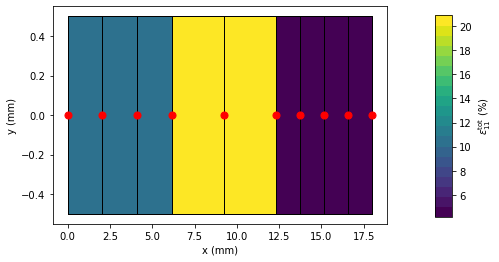


Graphical output of model with magnification factor 1


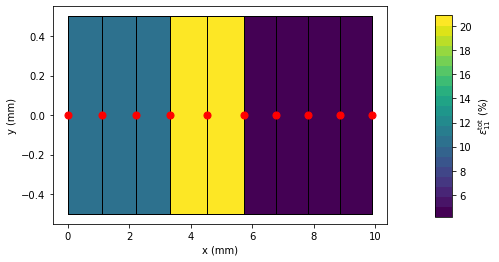

In [9]:
fem.calc_global()   # calculate global stress and strain
print('global stress: sig_11 =',  fem.glob['sig'][0].round(decimals=3), 'MPa')
print('global strain: eps_11 =', (fem.glob['eps'][0]*100).round(decimals=2), '%')
print('\nGraphical output of model with magnification factor 10')
fem.plot('strain1') # create plot
print('\nGraphical output of model with magnification factor 1')
fem.plot('strain1', mag=1)


## 2-dimensional model 1: iso-strain

A 2-d model with three different sections is created and subjected to a uniaxial stress parallel to the sections (y-direction), resulting in an iso-strain condition, because all sections are subject to the same total strain as the entire model. The effective eleastic properties are calculated numerically and compared to the results of the Voigt homogenization rule (iso-strain assumption).

2-d Model 1: iso-strain, plane stress, eps_22=10%
Global strain:  -0.03 0.1
Element strain Section 1:  [-0.03  0.1  -0.03  0.    0.    0.  ]
Element strain Section 2:  [-0.03  0.1  -0.03  0.    0.   -0.  ]
Element strain Section 3:  [-0.03  0.1  -0.03  0.    0.   -0.  ]
Global stress (MPa):  0.0 31111.111
Element stress (MPa) Section 1:  [    0. 20000.     0.     0.     0.     0.]
Element stress (MPa) Section 2:  [    0. 10000.     0.     0.     0.    -0.]
Element stress (MPa) Section 3:  [    0. 50000.     0.     0.     0.    -0.]
Stiffness (MPa):  311111.11111111275
Target (MPa):  311111.1111111111
Error:  -5.329070518200751e-15
----------------------------------------


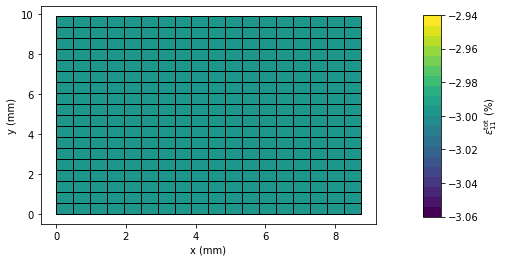

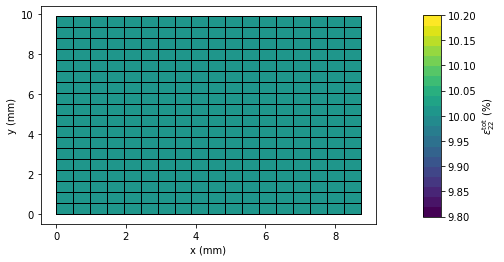

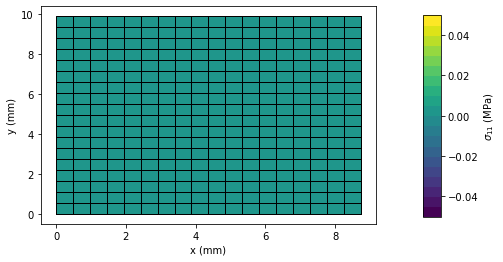

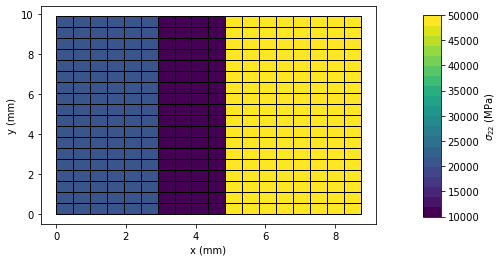

In [10]:
'2-d model, iso-strain'
comp=FE.Model(dim=2, planestress=True)
comp.geom([3,2,4], LY=9)        # define sections in absolute lengths
comp.assign([mat1, mat2, mat3]) # assign a material to each section
comp.bcleft(0.)                 # define boundary conditions
comp.bcright(0., 'force') 
comp.bcbot(0.)
comp.bctop(0.1*comp.leny, 'disp') # apply eps_22 strain at top boundary
comp.mesh(NX=18, NY=18)         # create structured mesh with 18x18 elements
comp.solve()                    # solve system of equations for mechanical equilibrium
comp.calc_global()              # evaluate global properties
mod_stiff = comp.glob['sig'][1]/comp.glob['eps'][1]
voigt_stiff = 3.*mat1.E/9 + 2*mat2.E/9 + 4*mat3.E/9 # weighted average of Young's moduli wrt volume fractions
print('2-d Model 1: iso-strain, plane stress, eps_22=10%')
print('Global strain: ',comp.glob['eps'][0].round(decimals=3), comp.glob['eps'][1].round(decimals=3))
print('Element strain Section 1: ', comp.element[0].eps.round(decimals=3))
print('Element strain Section 2: ', comp.element[6*18].eps.round(decimals=3))
print('Element strain Section 3: ', comp.element[10*18].eps.round(decimals=3))
print('Global stress (MPa): ',comp.glob['sig'][0].round(decimals=3), comp.glob['sig'][1].round(decimals=3))
print('Element stress (MPa) Section 1: ', comp.element[0].sig.round(decimals=3))
print('Element stress (MPa) Section 2: ', comp.element[6*18].sig.round(decimals=3))
print('Element stress (MPa) Section 3: ', comp.element[10*18].sig.round(decimals=3))
print('Stiffness (MPa): ',mod_stiff)
print('Target (MPa): ', voigt_stiff)
print('Error: ', 1.-mod_stiff/voigt_stiff)
print('----------------------------------------')

comp.plot('strain1', mag=1, shownodes=False)
comp.plot('strain2', mag=1, shownodes=False)
comp.plot('stress1', mag=1, shownodes=False)
comp.plot('stress2', mag=1, shownodes=False)


## 2-dimensional model 2: iso-stress

A 2-d model with three different sections is created and subjected to a uniaxial strain perpendicular to the sections (x-direction) resulting in an iso-stress condition, because all section are subject to the same stress in loading direction as the entire model. The effective eleastic properties are calculated numerically and compared to the results of the Reuss homogenization rule (iso-stress assumption).

2-d Model 2: isostress, eps_11=10%
Global strain:  0.1 0.0
Element strain Section 1:  [ 0.105 -0.     0.     0.     0.     0.   ]
Element strain Section 2:  [ 0.209 -0.     0.     0.     0.     0.   ]
Element strain Section 3:  [ 0.042  0.     0.     0.     0.    -0.   ]
Global stress:  28175.313 12075.134
Element stress (MPa) Section 1:  [28175.313 12075.134 12075.134     0.        0.        0.   ]
Element stress (MPa) Section 2:  [28175.313 12075.134 12075.134     0.        0.        0.   ]
Element stress (MPa) Section 3:  [28175.313 12075.134 12075.134     0.        0.       -0.   ]
Stiffness (MPa):  281753.13059033663
Target (MPa):  281753.1305903399
Error:  1.1546319456101628e-14
----------------------------------------


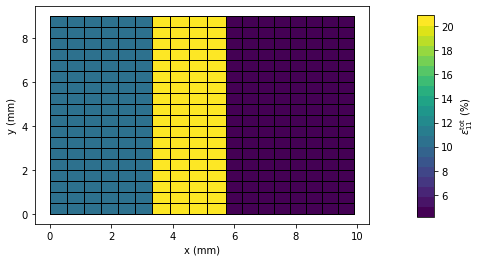

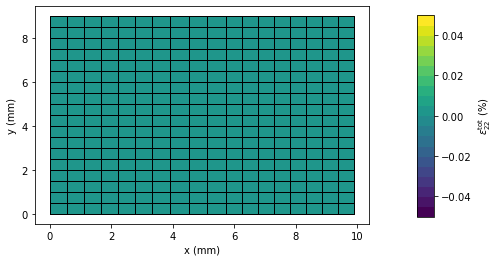

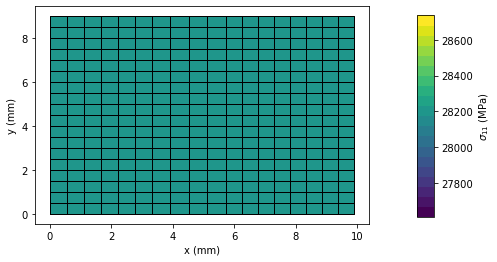

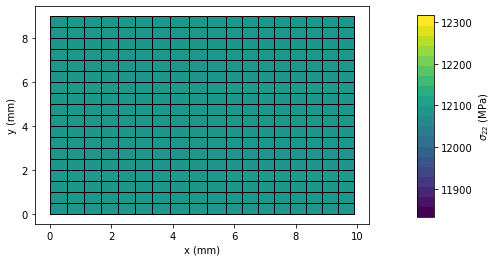

In [11]:
'2-d model, iso-stress'
comp2=FE.Model(dim=2, planestress=False)
comp2.geom([3,2,4], LY=9)  # define sections in absolute lengths
comp2.assign([mat1, mat2, mat3])
comp2.bcleft(0.)
comp2.bcright(0.1*comp2.lenx, 'disp') 
comp2.bcbot(0.)
comp2.bctop(0., 'disp')
comp2.mesh(NX=18, NY=18)
comp2.solve()
comp2.calc_global()
mod_stiff = comp2.glob['sig'][0]/comp2.glob['eps'][0]
reuss_stiff = 1./(3/(9*mat1.C11) + 2/(9*mat2.C11) + 4/(9*mat3.C11)) # Reuss average of stiffness
print('2-d Model 2: isostress, eps_11=10%')
print('Global strain: ',comp2.glob['eps'][0].round(decimals=3), comp2.glob['eps'][1].round(decimals=3))
print('Element strain Section 1: ', comp2.element[0].eps.round(decimals=3))
print('Element strain Section 2: ', comp2.element[6*18].eps.round(decimals=3))
print('Element strain Section 3: ', comp2.element[10*18].eps.round(decimals=3))
print('Global stress: ',comp2.glob['sig'][0].round(decimals=3), comp2.glob['sig'][1].round(decimals=3))
print('Element stress (MPa) Section 1: ', comp2.element[0].sig.round(decimals=3))
print('Element stress (MPa) Section 2: ', comp2.element[6*18].sig.round(decimals=3))
print('Element stress (MPa) Section 3: ', comp2.element[10*18].sig.round(decimals=3))
print('Stiffness (MPa): ',mod_stiff)
print('Target (MPa): ', reuss_stiff)
print('Error: ', 1.-mod_stiff/reuss_stiff)
print('----------------------------------------')

comp2.plot('strain1', mag=1, shownodes=False)
comp2.plot('strain2', mag=1, shownodes=False)
comp2.plot('stress1', mag=1, shownodes=False)
comp2.plot('stress2', mag=1, shownodes=False)

## Summary
FE models with linear elastic materials have been created and applied to analyze the mechanical response of elastic structures to given boundary conditions. The properties of linear-elastic structures are analysed more closely in the tutorial <a rel="Intro" href="https://ahartmaier.github.io/pyLabFEA/examples.html#tutorial-2-composites">Composites</a>.